<a href="https://colab.research.google.com/github/laccar1109/Classifica-o_usando_CNN.ipynb/blob/main/Classifica%C3%A7%C3%A3o_usando_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN - Distinguindo os diversos tipos de arroz integral

---






## 1.Importando as Bibliotecas

In [1]:
!pip install keras
!pip install tensorflow
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 13.1 MB/s eta 0:00:00


### 1.2 Importando o dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1.3 Importando as Bibliotecas

In [3]:
#Importar bibliotecas
import numpy as np
import pandas as pd
import os
import random
import matplotlib
import imageio

#Importar biblioteca para visaulizar dados
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import cv2


#Importar Tensorflow para criar modelos e dependencias
import tensorflow

#Gerar lotes de dados de imagem de tensor com aumento de dados em tempo real.
from keras.preprocessing.image import ImageDataGenerator


#Para ativar a plotagem em linha
%matplotlib  inline 

 ## 2.Imagem Pre-processada

In [4]:
#Reconhecimento de tipos de graos de arroz usando modelo de CNN
''' Esse script usa database de imagens criado por um modelo CNN acima para testar se reconhece a imagem correctamente ou nao'''

'''#################### IMAGEM PRE- PROCESSADA PARA TREINAMENTO E TESTE O BANCO ####################'''

TrainingImagePath ='/content/drive/MyDrive/Image Classification/train'
TestingImagePath = '/content/drive/MyDrive/Image Classification/test'
ValidationImagePath = '/content/drive/MyDrive/Image Classification/valid'

# Defining pre-processing transformations on raw images of training data
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)

# Defining pre-processing transformations on raw images of testing data
test_datagen = ImageDataGenerator(rescale=1./255)

# Generating the Training Data
training_set = train_datagen.flow_from_directory(
        TrainingImagePath,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')


# Generating the Testing Data
test_set = test_datagen.flow_from_directory(
        TestingImagePath,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

# Generating the Testing Data
valid_set = test_datagen.flow_from_directory(
        ValidationImagePath,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

Found 525 images belonging to 5 classes.
Found 175 images belonging to 5 classes.
Found 175 images belonging to 5 classes.


## 3.Função para plotar

In [5]:
# função para plotar qualquer imagem aleatória do conjunto de dados
def showImages(class_name):
    random_index = random.choice(list(range(5, 5)))
    folder_path=os.path.join(TrainingImagePath, class_name)
    try:
        image_path=os.path.join(folder_path,str(random_index).zfill(3)+".jpg")
        plt.imshow(mpimg.imread(image_path))
    except:
        image_path=os.path.join(folder_path,str(random_index).zfill(2)+".jpg")
        plt.imshow(mpimg.imread(image_path))
    plt.title(class_name)
    plt.axis(False)

## 3.1 As 5 layers

In [6]:
#Mostrar as classes e faces de cada grao
test_set.class_indices

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

#4.0 Plotar Graficos

IndexError: ignored

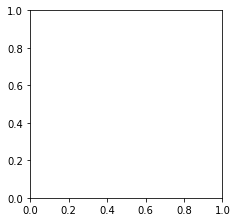

In [7]:
plt.figure(figsize= (20, 20))
for labels, number in training_set.class_indices.items ():  
    plt.subplot (5, 5, number+1) 
    showImages (labels)

#4.1  Criando tabela de consulta para mostrar

In [ ]:

'''####################Criando tabela de consulta para mostrar os diferentes grãos de arroz####################'''
# índices de classe têm a etiqueta numérica para cada grãos de arroz
TrainClasses=test_set.class_indices

#Armazenando a imagem e o numérica para referência futura
ResultMap=[]
for arrozValue, arrozName in (TrainClasses.values(), TrainClasses.Keys()):
ResultMap (arrozValues)= arrozName

# Guardar a o caminho da imagem para referência futura

import pickle as pkl
with open ('/content/drive/MyDrive/Image Classification/ResultMap.pkl', 'wb') as f:
    pickle.dump(ResultMap, f, pickle.HIGHEST_PROTOCOL)

print("Mapeando o arroz e o seu ID", ResultMap)    

# O número de neurônios para a camada de Output é igual ao número de imagens 
OutputNeurons = len( ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)

Mapping of Face and its ID 
{ 0:'Arborio', 1:'Basmati', 2:'Ipsala', 3: 'Jasmine', 4: 'Karacadag'}
The number of output neurons: 13

In [ ]:
import pickle as pkl
with open ('/content/drive/MyDrive/Image Classification/ResultMap.pkl', 'wb') as f:
    pickle.dump(ResultMap, f, pickle.HIGHEST_PROTOCOL)

## Criar lista de arroz e classe

In [ ]:
'''#################### Criar um modelo de aprendizado profundo usando CNN ####################'''
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

'''Incilizacao da Rede Neural Convolucional'''
classifier = Sequential() 


'''STEP--1 Convolution
# Adicionar a primeira Layer de CNN
# Usaremos o format (64, 64, 3) pois usaremos o Tensorflow backend
#Resultara em 3 matrizes de tamanho (64X64) pixels representando (RGB) vermelho, verde e azul componentes de pixels
'''
classifier.add(Convolution2D(32,kernel_size=(3,3), strides=(1, 1), activation= 'relu'))


'''# STEP--2 MAX Pooling '''
classifier.add(MaxPool2D(pool_size= ( 2,2)))

'''############## ADDITIONAL LAYER of CONVOLUTION for better accuracy #################'''
classifier.add(Convolution2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu'))

classifier.add(MaxPool2D(pool_size=(2,2)))


'''# STEP--3 FLattening'''
classifier.add(Flatten())

'''# STEP--4 Fully Connected Neural Network'''
classifier.add(Dense(256, activation='relu'))

classifier.add(Dense(OutputNeurons, activation='softmax'))

'''# Compiling the CNN'''
#classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.compile(loss='categorical_crossentropy', optimizer = 'rmsprop', metrics=["accuracy"])




In [ ]:
import time
# Measuring the time taken by the model to train
StartTime=time.time()

# Starting the model training
model_history=classifier.fit_generator(
                                        training_set,
                                        steps_per_epoch=len(training_set),
                                        epochs=20,
                                        validation_data=valid_set,
                                        validation_steps=len(valid_set),
                                        verbose=1)

EndTime=time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes #############')

In [ ]:
accuracy = model_history.history['accuracy']
val_accuracy  = model_history.history['val_accuracy']

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

In [ ]:
from pickleshare import pickle

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()

In [ ]:
## Saving the model
classifier.save("/content/drive/MyDrive/Image Classification/train/classifier.pkl")

In [ ]:
'''########################## Making single predictions ############################'''
from tensorflow.keras.utils import load_img, img_to_array

testImage="/content/drive/MyDrive/Image Classification/test/Arborio/Arborio (1).jpg"
test_image=load_img(testImage,target_size=(128, 128))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image,verbose=0)

img = cv2.imread(testImage)
# gray = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.imshow(img)
plt.title('picture')
plt.show()

print('####'*10)
print('Prediction is: ',ResultMap[np.argmax(result)])

In [ ]:
'''########################## Making single predictions ############################'''
testImage="/content/drive/MyDrive/Image Classification/test/Basmati/basmati (12).jpg"
test_image=load_img(testImage,target_size=(128, 128))
test_image=img_to_array(test_image)

test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image,verbose=0)

img = cv2.imread(testImage)
# gray = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.imshow(img)
plt.title('picture')
plt.show()

print('####'*10)
print('Prediction is: ',ResultMap[np.argmax(result)])

### Criando modelo CNN

In [ ]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)
